<a href="https://colab.research.google.com/github/magdalenamorawska/Uczenie-Maszynowe-w-Finansach-/blob/Use-Case-1/use_case_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Use Case 1**



In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


**Wczytywanie danych**





In [137]:
df = pd.read_csv('case1.csv', sep=';', error_bad_lines=False)

df.head()

<ipython-input-137-43a712f8940f>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('case1.csv', sep=';', error_bad_lines=False)


,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [139]:
df.describe()

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,4920.000000,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,2840.996333,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,2460.000000,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,4920.000000,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,7380.000000,2601.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,9840.000000,4729.000000,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


Sprawdzenie braków

In [140]:
braki = df.isnull().sum()
print("Liczba braków danych w poszczególnych kolumnach:")
print(braki)

Liczba braków danych w poszczególnych kolumnach:
Unnamed: 0                                                0
Index                                                     0
Address                                                   0
FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                       

Zamieniam braki najczęściej występującymi wartościami

In [141]:
for column in df.select_dtypes(include=['number']).columns:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

for column in df.select_dtypes(exclude=['number']).columns:
    most_frequent_value = df[column].mode()[0]
    df[column].fillna(most_frequent_value, inplace=True)

print(df)

      Unnamed: 0  Index                                     Address  FLAG  \
0              0      1  0x00009277775ac7d0d59eaad8fee3d10ac6c805e8     0   
1              1      2  0x0002b44ddb1476db43c868bd494422ee4c136fed     0   
2              2      3  0x0002bda54cb772d040f779e88eb453cac0daa244     0   
3              3      4  0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e     0   
4              4      5  0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89     0   
...          ...    ...                                         ...   ...   
9836        9836   2175  0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2     1   
9837        9837   2176  0xff718805bb9199ebf024ab6acd333e603ad77c85     1   
9838        9838   2177  0xff8e6af02d41a576a0c82f7835535193e1a6bccc     1   
9839        9839   2178  0xffde23396d57e10abf58bd929bb1e856c7718218     1   
9840        9840   2179  0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c     1   

      Avg min between sent tnx  Avg min between received tnx  \
0          

In [142]:
braki = df.isnull().sum()
print("Liczba braków danych w poszczególnych kolumnach:")
print(braki)

Liczba braków danych w poszczególnych kolumnach:
Unnamed: 0                                              0
Index                                                   0
Address                                                 0
FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent           

Tutaj jednak postanowiłam, że zajmę się kolumnami, które nie są liczbowe

In [143]:
kolumny_nieliczbowe = df.select_dtypes(exclude=['number']).columns

print("Kolumny nieliczbowe:")
print(kolumny_nieliczbowe)

Kolumny nieliczbowe:
Index(['Address', 'ERC20 most sent token type', 'ERC20_most_rec_token_type'], dtype='object')


I zastąpiłam je liczbowymi

In [144]:
label_encoder = LabelEncoder()
for column in kolumny_nieliczbowe:
    df[column] = label_encoder.fit_transform(df[column])

print(df)

      Unnamed: 0  Index  Address  FLAG  Avg min between sent tnx  \
0              0      1        0     0                    844.26   
1              1      2        1     0                  12709.07   
2              2      3        2     0                 246194.54   
3              3      4        3     0                  10219.60   
4              4      5        4     0                     36.61   
...          ...    ...      ...   ...                       ...   
9836        9836   2175     9808     1                  12635.10   
9837        9837   2176     9809     1                      0.00   
9838        9838   2177     9810     1                   2499.44   
9839        9839   2178     9811     1                      0.00   
9840        9840   2179     9454     1                  37242.70   

      Avg min between received tnx  Time Diff between first and last (Mins)  \
0                          1093.71                                704785.63   
1                        

Pozbywam się wartości odstających

In [155]:
isolation_forest = IsolationForest(random_state=42)

kolumna_flag = 0
X_train_bez_flag = df_oversamp.drop(df_oversamp.columns[kolumna_flag], axis=1)

outlier_pred = isolation_forest.fit_predict(X_train_bez_flag)

X_train = df_oversamp[outlier_pred == 1]
X_train = df_oversamp.drop(columns='FLAG')
y_train = df_oversamp['FLAG']

Standaryzacja zmiennych

In [156]:
std_scaler = StandardScaler()
df_data_stand = std_scaler.fit_transform(X_train)
df_data_stand_test = std_scaler.fit_transform(X_test)

In [157]:
df_data_stand_df = pd.DataFrame(df_data_stand, columns=X.columns)
df_data_stand_test_df = pd.DataFrame(df_data_stand_test, columns=X.columns)

Analiza głównych składowych

In [158]:
pca = PCA(n_components=2)

pca.fit(df)

df_transformed = pca.transform(df)

print(df_transformed)

[[-1.44489610e+08  1.50004622e+07]
 [-1.80261973e+08 -2.00434601e+07]
 [-1.80261835e+08 -2.00434631e+07]
 ...
 [-1.80260390e+08 -2.00434629e+07]
 [-2.27951525e-01  2.37246074e-01]
 [-1.80205757e+08 -2.00434559e+07]]


Oversampling

In [159]:
oversampler = RandomOverSampler(sampling_strategy=0.5)

X_resampled, y_resampled = oversampler.fit_resample(X, y)
print("Liczebność klas po oversamplingu:")
print(pd.Series(y_resampled).value_counts())

Liczebność klas po oversamplingu:
0    7662
1    3831
Name: FLAG, dtype: int64


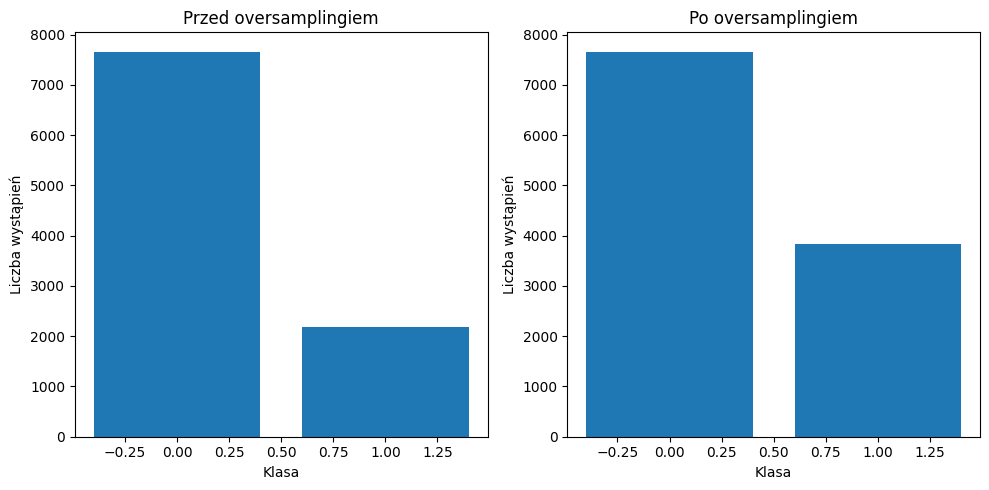

In [160]:
liczebnosc_przed = pd.Series(y).value_counts()
liczebnosc_po = pd.Series(y_resampled).value_counts()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].bar(liczebnosc_przed.index, liczebnosc_przed.values)
ax[0].set_title('Przed oversamplingiem')
ax[0].set_xlabel('Klasa')
ax[0].set_ylabel('Liczba wystąpień')

ax[1].bar(liczebnosc_po.index, liczebnosc_po.values)
ax[1].set_title('Po oversamplingiem')
ax[1].set_xlabel('Klasa')
ax[1].set_ylabel('Liczba wystąpień')

plt.tight_layout()
plt.show()

Undersampling

In [161]:
undersampler = RandomUnderSampler(sampling_strategy=0.5)

X_resampled, y_resampled = undersampler.fit_resample(X, y)

print("Liczebność klas po undersamplingu:")
print(pd.Series(y_resampled).value_counts())

Liczebność klas po undersamplingu:
0    4358
1    2179
Name: FLAG, dtype: int64


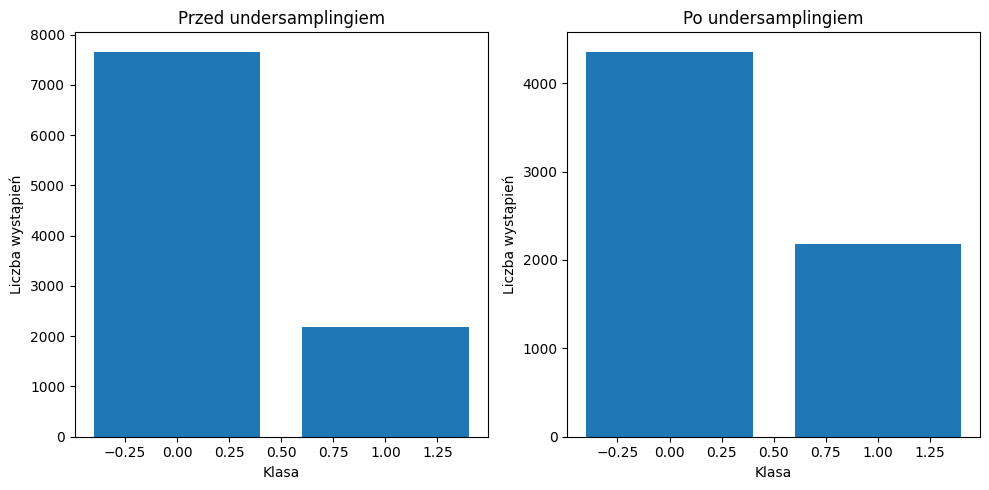

In [162]:
liczebnosc_przed = pd.Series(y).value_counts()
liczebnosc_po = pd.Series(y_resampled).value_counts()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].bar(liczebnosc_przed.index, liczebnosc_przed.values)
ax[0].set_title('Przed undersamplingiem')
ax[0].set_xlabel('Klasa')
ax[0].set_ylabel('Liczba wystąpień')

ax[1].bar(liczebnosc_po.index, liczebnosc_po.values)
ax[1].set_title('Po undersamplingiem')
ax[1].set_xlabel('Klasa')
ax[1].set_ylabel('Liczba wystąpień')

plt.tight_layout()
plt.show()

KNN


In [163]:
X_train_without_flag_index = X_train.drop(columns=['Index'])
X_test_without_flag_index = X_test.drop(columns=['Index'])

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_without_flag_index, y_train)

y_pred = knn.predict(X_test_without_flag_index)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9812087353986796
Precision: 0.9372197309417041
Recall: 0.9789227166276346
Confusion Matrix:
[[1514   28]
 [   9  418]]


Regresja logistyczna

In [168]:
X_train_without_flag_index = X_train.drop(columns=['Unnamed: 0','Index'])
X_test_without_flag_index = X_test.drop(columns=['Unnamed: 0','Index'])

# Inicjalizacja i dopasowanie skalera
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_without_flag_index)
X_test_scaled = scaler.transform(X_test_without_flag_index)

# Inicjalizacja modelu LogisticRegression z ustawieniem max_iter
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Dopasowanie modelu do danych treningowych
model.fit(X_train_scaled, y_train)

# Wykonanie predykcji na danych testowych
y_pred = model.predict(X_test_scaled)

# Obliczenie miar jakości klasyfikacji
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Wyświetlenie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Macierz pomyłek
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8430675469781616
Precision: 0.588855421686747
Recall: 0.9156908665105387
Confusion Matrix:
[[1269  273]
 [  36  391]]


Las losowy

In [169]:
X_train_without_index = X_train.drop(columns=['Unnamed: 0' ,'Index'])
X_test_without_index = X_test.drop(columns=['Unnamed: 0' ,'Index'])

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest.fit(X_train_without_index, y_train)

y_pred = random_forest.predict(X_test_without_index)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)



Accuracy: 0.9974606399187405
Precision: 1.0
Recall: 0.9882903981264637
Confusion Matrix:
[[1542    0]
 [   5  422]]
